In [3]:
#Load in Statsbomb competition and match data
#This is a library for loading json files.
import json

#Load the competition file
#Got this by searching 'how do I open json in Python'
with open('/Users/mac/Tengku/football/data/competitions.json') as f:
    competitions = json.load(f)
    
#Womens World Cup 2019 has competition ID 72
competition_id=72

#Load the list of matches for this competition
with open('/Users/mac/Tengku/football/data/matches/'+str(competition_id)+'/30.json') as f:
    matches = json.load(f)

#Look inside matches
# matches[0]
# matches[0]['home_team']
# matches[0]['home_team']['home_team_name']
# matches[0]['away_team']['away_team_name']

#Print all match results
for match in matches:
    home_team_name=match['home_team']['home_team_name']
    away_team_name=match['away_team']['away_team_name']
    home_score=match['home_score']
    away_score=match['away_score']
    describe_text = 'The match between ' + home_team_name + ' and ' + away_team_name
    result_text = ' finished ' + str(home_score) +  ' : ' + str(away_score)
    print(describe_text + result_text)

#Now lets find a match we are interested in
home_team_required ="England Women's"
away_team_required ="Sweden Women's"

#Find ID for the match
for match in matches:
    home_team_name=match['home_team']['home_team_name']
    away_team_name=match['away_team']['away_team_name']
    if (home_team_name==home_team_required) and (away_team_name==away_team_required):
        match_id_required = match['match_id']
print(home_team_required + ' vs ' + away_team_required + ' has id:' + str(match_id_required))

#Exercise: 
#1, Edit the code above to print out the result list for the Mens World cup 
#2, Edit the code above to find the ID for England vs. Sweden
#3, Write new code to write out a list of just Sweden's results in the tournament.

The match between Sweden Women's and Canada Women's finished 1 : 0
The match between Cameroon Women's and New Zealand Women's finished 2 : 1
The match between Germany Women's and Nigeria Women's finished 3 : 0
The match between England Women's and Sweden Women's finished 1 : 2
The match between Jamaica Women's and Australia Women's finished 1 : 4
The match between Italy Women's and Netherlands Women's finished 0 : 2
The match between France Women's and Brazil Women's finished 2 : 1
The match between Germany Women's and Sweden Women's finished 1 : 2
The match between England Women's and Scotland Women's finished 2 : 1
The match between Sweden Women's and Thailand Women's finished 5 : 1
The match between Japan Women's and England Women's finished 0 : 2
The match between Korea Republic Women's and Norway Women's finished 1 : 2
The match between United States Women's and Chile Women's finished 3 : 0
The match between Norway Women's and Australia Women's finished 1 : 1
The match between Nor

In [21]:
for match in matches:
    home_team_name=match['home_team']['home_team_name']
    away_team_name=match['away_team']['away_team_name']
    home_score=match['home_score']
    away_score=match['away_score']
    describe_text = 'The match between ' + home_team_name + ' and ' + away_team_name
    result_text = ' finished ' + str(home_score) +  ' : ' + str(away_score)
    print(describe_text + result_text)

#/////////////////////////

    home_team_required ="England"
    away_team_required ="Sweden"

for match in matches:
    home_team_name=match['home_team']['home_team_name']
    away_team_name=match['away_team']['away_team_name']
if (home_team_name==home_team_required) and (away_team_name==away_team_required):
        match_id_required = match['match_id']
print(home_team_required + ' vs ' + away_team_required + ' has id:' + str(match_id_required))

The match between Croatia and Denmark finished 1 : 1
The match between Nigeria and Iceland finished 2 : 0
The match between Poland and Colombia finished 0 : 3
The match between Croatia and Nigeria finished 2 : 0
The match between Brazil and Costa Rica finished 2 : 0
The match between Germany and Mexico finished 0 : 1
The match between Australia and Peru finished 0 : 2
The match between Serbia and Brazil finished 0 : 2
The match between Senegal and Colombia finished 0 : 1
The match between Panama and Tunisia finished 1 : 2
The match between Switzerland and Costa Rica finished 2 : 2
The match between France and Australia finished 2 : 1
The match between Uruguay and Russia finished 3 : 0
The match between Brazil and Mexico finished 2 : 0
The match between Russia and Croatia finished 2 : 2
The match between Denmark and Australia finished 1 : 1
The match between Costa Rica and Serbia finished 0 : 1
The match between France and Peru finished 1 : 0
The match between Belgium and Japan finished

In [24]:
for match in matches:
    home_team_name=match['home_team']['home_team_name']
    away_team_name=match['away_team']['away_team_name']
    if (home_team_name=='Sweden' or away_team_name=='Sweden'):
        home_score=match['home_score']
        away_score=match['away_score']
        describe_text = 'The match between ' + home_team_name + ' and ' + away_team_name
        result_text = ' finished ' + str(home_score) +  ' : ' + str(away_score)
        print(describe_text + result_text)

The match between Sweden and South Korea finished 1 : 0
The match between Mexico and Sweden finished 0 : 3
The match between Sweden and Switzerland finished 1 : 0
The match between Sweden and England finished 0 : 2
The match between Germany and Sweden finished 2 : 1


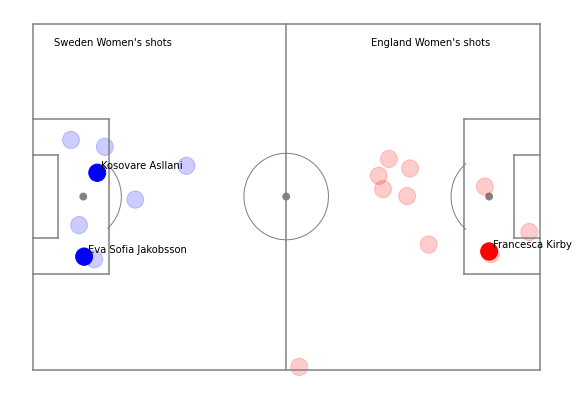

In [8]:
#Make a shot map and a pass map using Statsbomb data
#Set match id in match_id_required.

#Function to draw the pitch
import matplotlib.pyplot as plt
import numpy as np

#Size of the pitch in yards (!!!)
pitchLengthX=120
pitchWidthY=80

#ID for England vs Sweden Womens World Cup
match_id_required = 69301
home_team_required ="England Women's"
away_team_required ="Sweden Women's"

# Load in the data
# I took this from https://znstrider.github.io/2018-11-11-Getting-Started-with-StatsBomb-Data/
file_name=str(match_id_required)+'.json'

#Load in all match events 
import json
with open('/Users/mac/Tengku/football/data/events/'+file_name) as data_file:
    #print (mypath+'events/'+file)
    data = json.load(data_file)

#get the nested structure into a dataframe 
#store the dataframe in a dictionary with the match id as key (remove '.json' from string)
from pandas.io.json import json_normalize
df = json_normalize(data, sep = "_").assign(match_id = file_name[:-5])

#A dataframe of shots
shots = df.loc[df['type_name'] == 'Shot'].set_index('id')
    
#Draw the pitch
from Soccermatics.FCPython import createPitch
(fig,ax) = createPitch(pitchLengthX,pitchWidthY,'yards','gray')

#Plot the shots
for i,shot in shots.iterrows():
    x=shot['location'][0]
    y=shot['location'][1]
    
    goal=shot['shot_outcome_name']=='Goal'
    team_name=shot['team_name']
    
    circleSize=2

    if (team_name==home_team_required):
        if goal:
            shotCircle=plt.Circle((x,pitchWidthY-y),circleSize,color="red")
            plt.text((x+1),pitchWidthY-y+1,shot['player_name']) 
        else:
            shotCircle=plt.Circle((x,pitchWidthY-y),circleSize,color="red")     
            shotCircle.set_alpha(.2)
    elif (team_name==away_team_required):
        if goal:
            shotCircle=plt.Circle((pitchLengthX-x,y),circleSize,color="blue") 
            plt.text((pitchLengthX-x+1),y+1,shot['player_name']) 
        else:
            shotCircle=plt.Circle((pitchLengthX-x,y),circleSize,color="blue")      
            shotCircle.set_alpha(.2)
    ax.add_patch(shotCircle)
    
    
plt.text(5,75,away_team_required + ' shots') 
plt.text(80,75,home_team_required + ' shots') 
     
fig.set_size_inches(10, 7)
fig.savefig('/Users/mac/Tengku/football/Output/shots.pdf', dpi=100) 
plt.show()

#Exercise: 
#1, Create a dataframe of passes which contains all the passes in the match
#2, Plot the start point of every Sweden pass. Attacking left to right.
#3, Plot only passes made by Caroline Seger (she is Sara Caroline Seger in the database)
#4, Plot arrows to show where the passes we



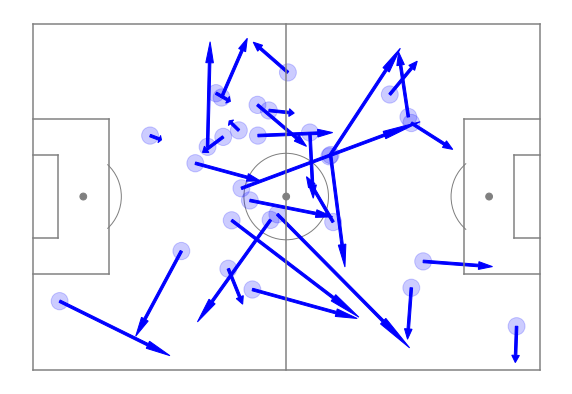

In [27]:
#Make a pass map and a pass map using Statsbomb data

#Find the passes
passes = df.loc[df['type_name'] == 'Pass'].set_index('id')

#Draw the pitch
(fig,ax) = createPitch(pitchLengthX,pitchWidthY,'yards','gray')

for i,thepass in passes.iterrows():
    if thepass['player_name']=='Sara Caroline Seger':
        x=thepass['location'][0]
        y=thepass['location'][1]
        passCircle=plt.Circle((x,pitchWidthY-y),2,color="blue")      
        passCircle.set_alpha(.2)   
        ax.add_patch(passCircle)
        dx=thepass['pass_end_location'][0]-x
        dy=thepass['pass_end_location'][1]-y

        passArrow=plt.Arrow(x,pitchWidthY-y,dx,-dy,width=3,color="blue")
        ax.add_patch(passArrow)

fig.set_size_inches(10, 7)
fig.savefig('/Users/mac/Tengku/football/Output/passes.pdf', dpi=100) 
plt.show()